In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [57]:
def hadamard_matrix(n):
    if n == 0:
        return np.array([[1]])
    else:
        h_n_minus_1 = hadamard_matrix(n - 1)
        top_left = np.concatenate((h_n_minus_1, h_n_minus_1), axis=1)
        bottom_left = np.concatenate((h_n_minus_1, -h_n_minus_1), axis=1)
        h_n = np.concatenate((top_left, bottom_left), axis=0)
        return h_n

In [58]:
def inverse_hadamard_matrix(H):
    # The inverse of a Hadamard matrix is its transpose
    return H.T

In [59]:
def walsh_hadamard_transform_2d(image, threshold=0.1):
    if image is None:
        raise ValueError("Error reading image. Check the image path.")

    rows, cols = image.shape
    max_dim = max(rows, cols)

    # Find the nearest power of 2 for padding
    target_dim = 2 ** int(np.ceil(np.log2(max_dim)))

    # Pad the image to make it square with the nearest power-of-2 side length
    padded_image = np.zeros((target_dim, target_dim), dtype=image.dtype)
    padded_image[:rows, :cols] = image

    transform_matrix = hadamard_matrix(int(np.log2(target_dim)))
    transformed_image = np.dot(transform_matrix, padded_image)

    # Thresholding: Set small coefficients to zero
    transformed_image[np.abs(transformed_image) < threshold] = 0

    return transformed_image, transform_matrix

In [60]:
def compress_image_lossless(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise ValueError(f"Error reading image from path: {image_path}")


    # Perform 2D Walsh-Hadamard transform
    transformed_image, H = walsh_hadamard_transform_2d(image)

    # Reconstruct the image using the inverse transform
    reconstructed_image = np.dot(inverse_hadamard_matrix(H), transformed_image)

    return transformed_image,reconstructed_image

In [61]:
# Example usage:
image_path = "/content/cat.jpg"
transformed_image,reconstructed_image=compress_image_lossless(image_path)

In [62]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
print("origin image :")
print(image)

origin image :
[[ 98  98  97 ... 108 107 107]
 [ 98  97  97 ... 107 107 107]
 [ 97  97  97 ... 107 107 107]
 ...
 [ 94  94  94 ... 125 125 125]
 [ 94  94  94 ... 125 125 125]
 [ 94  94  94 ... 126 126 126]]


In [66]:
print("Transformed matrix : ")
print(transformed_image[:400,:400])

Transformed matrix : 
[[37958 37961 37953 ... 55182 55273 55651]
 [    8     3     3 ...   184   395   171]
 [    0     7     9 ...   -22    67  -373]
 ...
 [    4     7     3 ...   228   125   165]
 [    8     7     1 ...   530   421   213]
 [    2     1    -1 ...   304    11   153]]


In [64]:
print("reconstructed matrix : ")
print(reconstructed_image)

reconstructed matrix : 
[[100352 100352  99328 ...      0      0      0]
 [100352  99328  99328 ...      0      0      0]
 [ 99328  99328  99328 ...      0      0      0]
 ...
 [     0      0      0 ...      0      0      0]
 [     0      0      0 ...      0      0      0]
 [     0      0      0 ...      0      0      0]]


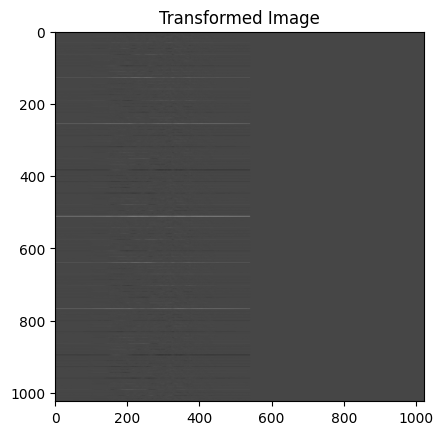

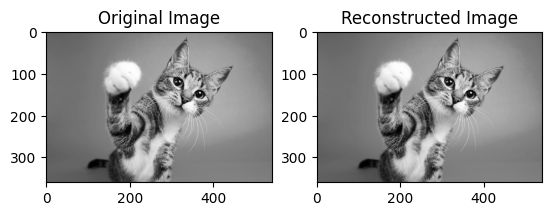

In [65]:
# # Display transformed image
plt.imshow(transformed_image, cmap='gray')
plt.title("Transformed Image")
plt.show()
# Display original and reconstructed images
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

row,col=image.shape

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image[:row,:col], cmap='gray')
plt.title("Reconstructed Image")

plt.show()
